Importing necessary modules

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Create the databases for the different companies

In [28]:
bigDf = pd.read_csv("twitter_corpus-master/corpus.csv")

appleDf = bigDf[(bigDf['Topic'] == 'apple') & (bigDf['Sentiment'] != 'irrelevant')]
googleDf = bigDf[(bigDf['Topic'] == 'google') & (bigDf['Sentiment'] != 'irrelevant')]
microsoftDf = bigDf[(bigDf['Topic'] == 'microsoft') & (bigDf['Sentiment'] != 'irrelevant')]
twitterDf = bigDf[(bigDf['Topic'] == 'twitter') & (bigDf['Sentiment'] != 'irrelevant')]

Count positive, neautral, negative and irrelevant tweets for each company

In [49]:
def countTweets(df):
    positive = df['Sentiment'].value_counts().get('positive')
    neutral = df['Sentiment'].value_counts().get('neutral')
    negative = df['Sentiment'].value_counts().get('negative')
    return positive, neutral, negative 

applePos, appleNeut, appleNeg = countTweets(appleDf)
googlePos, googleNeut, googleNeg= countTweets(googleDf)
microsoftPos, microsoftNeut, microsoftNeg = countTweets(microsoftDf)
twitterPos, twitterNeut, twitterNeg = countTweets(twitterDf)


Visualising the different tweet counts

In [ ]:
companies = ['Apple', 'Google', 'Microsoft', 'Twitter']
positive = [applePos, googlePos, microsoftPos, twitterPos]
neutral = [appleNeut, googleNeut, microsoftNeut, twitterNeut]
negative = [appleNeg, googleNeg, microsoftNeg, twitterNeg]

bar_width = 0.2
x = np.arange(len(companies))

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, positive, width=bar_width, label='Positive', color='#99ff99')
plt.bar(x, neutral, width=bar_width, label='Neutral', color='#66b3ff')
plt.bar(x + bar_width, negative, width=bar_width, label='Negative', color='#ff9999')

plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Sentiment Comparison by Company')
plt.xticks(x, companies)
plt.legend()

plt.tight_layout()
plt.show()

Visualise them as a percentage of the total tweets mentioning the company

In [ ]:
data = [
    [applePos, appleNeut, appleNeg],
    [googlePos, googleNeut, googleNeg],
    [microsoftPos, microsoftNeut, microsoftNeg],
    [twitterPos, twitterNeut, twitterNeg],
]
labels = ['Positive', 'Neutral', 'Negative']
colors = ['#99ff99', '#66b3ff', '#ff9999']

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, ax in enumerate(axes):
    ax.pie(
        data[i],
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
    )
    ax.set_title(companies[i])

plt.suptitle('Sentiment Distribution by Company', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


Same data without the neutral tweets

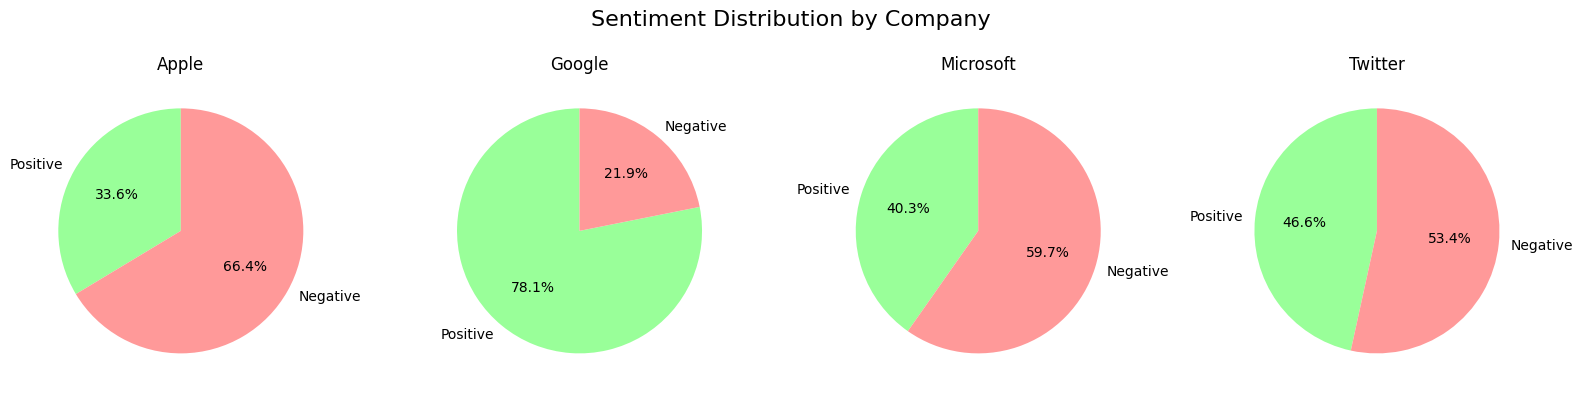

In [59]:
data = [
    [applePos, appleNeg],
    [googlePos, googleNeg],
    [microsoftPos, microsoftNeg],
    [twitterPos, twitterNeg],
]
labels = ['Positive', 'Negative']
colors = ['#99ff99', '#ff9999']

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, ax in enumerate(axes):
    ax.pie(
        data[i],
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
    )
    ax.set_title(companies[i])

plt.suptitle('Sentiment Distribution by Company', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()
